# Data Extraction

## 라이브러리 임포트

In [1]:

import datetime
import pandas as pd
from pandas import DataFrame
from scipy.io import loadmat

## 가져올 데이터셋 입력

In [2]:
BAT_No = input()

In [3]:
BAT_No

'B0005'

## Charge cycles 데이터 추출

In [4]:
def charge_data(battery):  # similarly write a fn for charge data
    mat = loadmat("../DATA/RAW/BatteryAgingARC-FY08Q4/" + BAT_No + ".mat")
    c = 0
    chdataset = []

    for i in range(len(mat[battery][0, 0]["cycle"][0])):
        row = mat[battery][0, 0]["cycle"][0, i]
        if row["type"][0] == "charge":

            ambient_temperature = row["ambient_temperature"][0][0]
            date_time = datetime.datetime(
                int(row["time"][0][0]),
                int(row["time"][0][1]),
                int(row["time"][0][2]),
                int(row["time"][0][3]),
                int(row["time"][0][4]),
            ) + datetime.timedelta(seconds=int(row["time"][0][5]))
            data = row["data"]
            for j in range(len(data[0][0]["Voltage_measured"][0])):
                voltage_measured = data[0][0]["Voltage_measured"][0][j]
                current_measured = data[0][0]["Current_measured"][0][j]
                temperature_measured = data[0][0]["Temperature_measured"][0][j]
                current_charge = data[0][0]["Current_charge"][0][j]
                voltage_charge = data[0][0]["Voltage_charge"][0][j]
                time = data[0][0]["Time"][0][j]
                chdataset.append(
                    [
                        c + 1,
                        ambient_temperature,
                        date_time,
                        voltage_measured,
                        current_measured,
                        temperature_measured,
                        current_charge,
                        voltage_charge,
                        time,
                    ]
                )
            c = c + 1
    
    return chdataset

In [5]:
charge_dataset = charge_data(BAT_No)
charge_df=pd.DataFrame(data=charge_dataset,columns=['cycle', 'ambient_temperature', 'datetime', 
                                'voltage_measured','current_measured',
                                'temperature_measured','current',
                                'voltage', 'time'])

charge_df

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current,voltage,time
0,1,24,2008-04-02 13:08:17,3.873017,-0.001201,24.655358,0.000,0.003,0.000
1,1,24,2008-04-02 13:08:17,3.479394,-4.030268,24.666480,-4.036,1.570,2.532
2,1,24,2008-04-02 13:08:17,4.000588,1.512731,24.675394,1.500,4.726,5.500
3,1,24,2008-04-02 13:08:17,4.012395,1.509063,24.693865,1.500,4.742,8.344
4,1,24,2008-04-02 13:08:17,4.019708,1.511318,24.705069,1.500,4.753,11.125
...,...,...,...,...,...,...,...,...,...
541168,170,24,2008-05-28 11:09:42,0.236356,-0.003484,23.372048,0.000,0.003,0.000
541169,170,24,2008-05-28 11:09:42,0.003365,-0.001496,23.369434,0.000,0.003,2.547
541170,170,24,2008-05-28 11:09:42,4.985137,0.000506,23.386535,0.000,5.002,5.500
541171,170,24,2008-05-28 11:09:42,4.984720,0.000442,23.386983,-0.002,5.002,8.312


### 각 베터리 데이터셋의 특이사항 삭제

In [6]:
if BAT_No == "B0005":
    # B0005
    charge_df.drop(charge_df[charge_df["cycle"] == 1].index, axis=0, inplace=True)
    charge_df.drop(charge_df[charge_df["cycle"] == 33].index, axis=0, inplace=True)
    charge_df.drop(charge_df[charge_df["cycle"] == 170].index, axis=0, inplace=True) #charge 데이터셋의 170cycle 삭제 , 170cycle의 capacity 없음

elif BAT_No == "B0006":
    # B0006
    charge_df.drop(charge_df[charge_df["cycle"] == 1].index, axis=0, inplace=True)
    charge_df.drop(charge_df[charge_df["cycle"] == 33].index, axis=0, inplace=True)
    charge_df.drop(charge_df[charge_df["cycle"] == 170].index, axis=0, inplace=True) #charge 데이터셋의 170cycle 삭제 , 170cycle의 capacity 없음

elif BAT_No == "B0007":
    # B0007
    charge_df.drop(charge_df[charge_df["cycle"] == 1].index, axis=0, inplace=True)
    charge_df.drop(charge_df[charge_df["cycle"] == 33].index, axis=0, inplace=True)
    charge_df.drop(charge_df[charge_df["cycle"] == 170].index, axis=0, inplace=True) #charge 데이터셋의 170cycle 삭제 , 170cycle의 capacity 없음

elif BAT_No == "B0018":
    # B0018
    charge_df.drop(charge_df[charge_df["cycle"] == 1].index, axis=0, inplace=True)
    charge_df.drop(charge_df[charge_df["cycle"] == 47].index, axis=0, inplace=True)
    charge_df.drop(charge_df[charge_df["cycle"] == 58].index, axis=0, inplace=True)

### 이상치 제거

In [7]:
outliner_index = []

for col in charge_df.columns:
    if col == "voltage" or col == "current":
        col_mean = charge_df[col].mean()
        col_std = charge_df[col].std()

        for row in charge_df.index:
            z_score = (charge_df.loc[row, col] - col_mean) / col_std

            if z_score >= 3 or z_score <= -3 :
                if row not in outliner_index:
                    outliner_index.append(row)

charge_df.drop(outliner_index, axis=0, inplace=True)


### 0초 데이터 삭제

In [8]:
charge_df.drop(charge_df[charge_df["time"] == 0].index, axis=0, inplace=True)

### 7200초 이후 데이터 삭제 (CCCV충전임으로 7200초 이후 부터는 데이터의 뚜렷한 차이 X)

In [9]:
charge_df.drop(charge_df[charge_df["time"] >= 7200].index, axis=0, inplace=True)

## Discharge cycles

In [10]:
def disch_data(BAT_No):
    mat = loadmat("../DATA/RAW/BatteryAgingARC-FY08Q4/" + BAT_No + ".mat")

    c = 0
    disdataset = []
    capacity_data = []

    for i in range(len(mat[BAT_No][0, 0]["cycle"][0])):
        row = mat[BAT_No][0, 0]["cycle"][0, i]
        if row["type"][0] == "discharge":
            ambient_temperature = row["ambient_temperature"][0][0]
            date_time = datetime.datetime(
                int(row["time"][0][0]),
                int(row["time"][0][1]),
                int(row["time"][0][2]),
                int(row["time"][0][3]),
                int(row["time"][0][4]),
            ) + datetime.timedelta(seconds=int(row["time"][0][5]))
            data = row["data"]
            capacity = data[0][0]["Capacity"][0][0]
            for j in range(len(data[0][0]["Voltage_measured"][0])):
                voltage_measured = data[0][0]["Voltage_measured"][0][j]
                current_measured = data[0][0]["Current_measured"][0][j]
                temperature_measured = data[0][0]["Temperature_measured"][0][j]
                current_load = data[0][0]["Current_load"][0][j]
                voltage_load = data[0][0]["Voltage_load"][0][j]
                time = data[0][0]["Time"][0][j]
                disdataset.append(
                    [
                        c + 1,
                        ambient_temperature,
                        date_time,
                        capacity,
                        voltage_measured,
                        current_measured,
                        temperature_measured,
                        current_load,
                        voltage_load,
                        time,
                    ]
                )
                capacity_data.append([c + 1, ambient_temperature, date_time, capacity])
            c = c + 1
    
    return pd.DataFrame(
            data=disdataset,
            columns=[
                "cycle",
                "ambient_temperature",
                "datetime",
                "capacity",
                "voltage_measured",
                "current_measured",
                "temperature_measured",
                "current",
                "voltage",
                "time",
            ]
    )
    


In [11]:
discharge_df = disch_data(BAT_No)
discharge_df.drop(discharge_df[discharge_df["cycle"] == 1].index, axis=0, inplace=True)
display(discharge_df)
capacity = discharge_df["capacity"].unique()

capacity_df = pd.DataFrame(capacity, columns=["capacity"])
capacity_df.index = [i + 1 for i in capacity_df.index]
capacity_df

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current,voltage,time
197,2,24,2008-04-02 19:43:48,1.846327,4.189773,0.000021,24.697752,-0.0006,0.000,0.000
198,2,24,2008-04-02 19:43:48,1.846327,4.188881,-0.000879,24.685948,-0.0006,4.204,16.672
199,2,24,2008-04-02 19:43:48,1.846327,3.979157,-2.014654,24.738132,-1.9984,3.056,35.703
200,2,24,2008-04-02 19:43:48,1.846327,3.956924,-2.013703,24.897071,-1.9982,3.024,53.828
201,2,24,2008-04-02 19:43:48,1.846327,3.940054,-2.012797,25.084750,-1.9984,3.003,71.891
...,...,...,...,...,...,...,...,...,...,...
50280,168,24,2008-05-27 20:45:42,1.325079,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312
50281,168,24,2008-05-27 20:45:42,1.325079,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062
50282,168,24,2008-05-27 20:45:42,1.325079,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828
50283,168,24,2008-05-27 20:45:42,1.325079,3.587336,0.001219,34.565580,0.0006,0.000,2810.640


,capacity
1,1.846327
2,1.835349
3,1.835263
4,1.834646
5,1.835662
...,...
163,1.293464
164,1.288003
165,1.287453
166,1.309015


### Save

In [12]:
charge_df.to_csv(f"../DATA/DataFrame/{BAT_No}_charge_df.csv", index=False)
capacity_df.to_csv(f"../DATA/DataFrame/{BAT_No}_capacity_df.csv", index=False)

### 데이터 점검

In [13]:
import matplotlib.pyplot as plt

In [14]:
bat_df = pd.read_csv(f"../DATA/DataFrame/{BAT_No}_charge_df.csv")
bat_df

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current,voltage,time
0,2,24,2008-04-02 16:37:51,3.434644,1.508670,29.334717,1.498,4.142,5.500
1,2,24,2008-04-02 16:37:51,3.454857,1.510043,29.341949,1.498,4.180,8.391
2,2,24,2008-04-02 16:37:51,3.468788,1.508704,29.331462,1.498,4.196,11.266
3,2,24,2008-04-02 16:37:51,3.480954,1.511625,29.322898,1.500,4.207,14.141
4,2,24,2008-04-02 16:37:51,3.491931,1.509182,29.302353,1.498,4.223,17.031
...,...,...,...,...,...,...,...,...,...
376876,169,24,2008-05-27 17:53:59,4.205308,0.070945,23.957315,0.069,4.256,7188.000
376877,169,24,2008-05-27 17:53:59,4.205265,0.066751,23.955934,0.069,4.256,7190.906
376878,169,24,2008-05-27 17:53:59,4.205346,0.070952,23.951416,0.069,4.256,7193.812
376879,169,24,2008-05-27 17:53:59,4.205299,0.067115,23.951201,0.069,4.256,7196.718


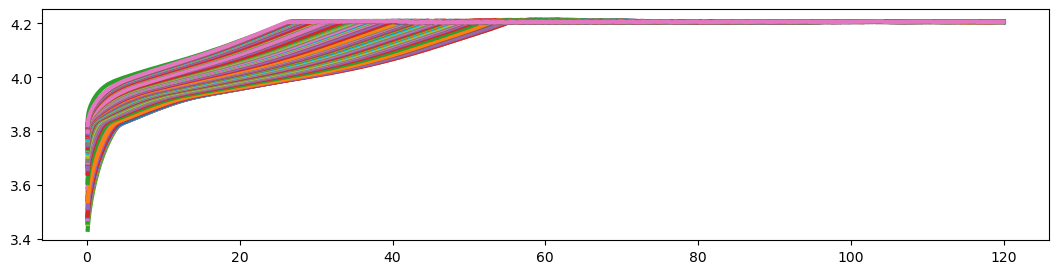

In [15]:
plt.rcParams['figure.figsize'] = [13, 3]
for i in range(167):
    tmp = bat_df.loc[bat_df.loc[:,"cycle"] == i]
    plt.plot(tmp.loc[:,"time"]/60, tmp.loc[:,"voltage_measured"], linewidth=3)
        

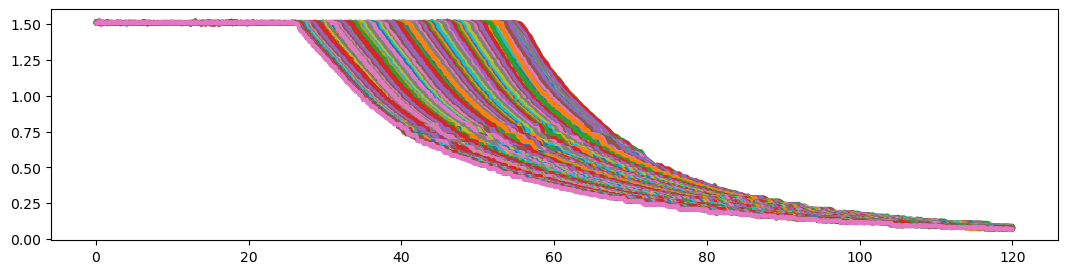

In [16]:
for i in range(167):
    tmp = bat_df.loc[bat_df.loc[:,"cycle"] == i]
    plt.plot(tmp.loc[:,"time"]/60, tmp.loc[:,"current_measured"], linewidth=3)

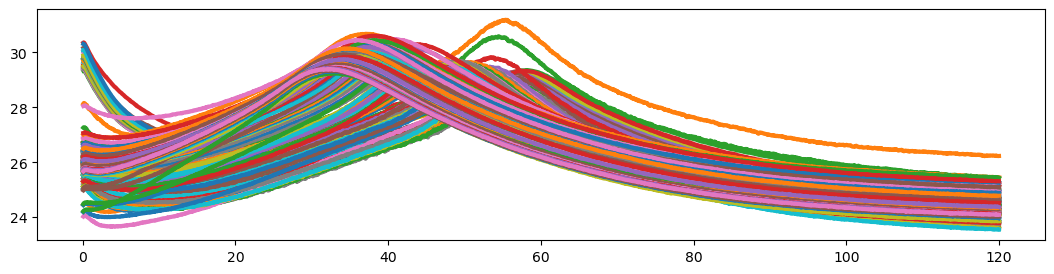

In [17]:
for i in range(167):
    tmp = bat_df.loc[bat_df.loc[:,"cycle"] == i]
    plt.plot(tmp.loc[:,"time"]/60, tmp.loc[:,"temperature_measured"], linewidth=3)

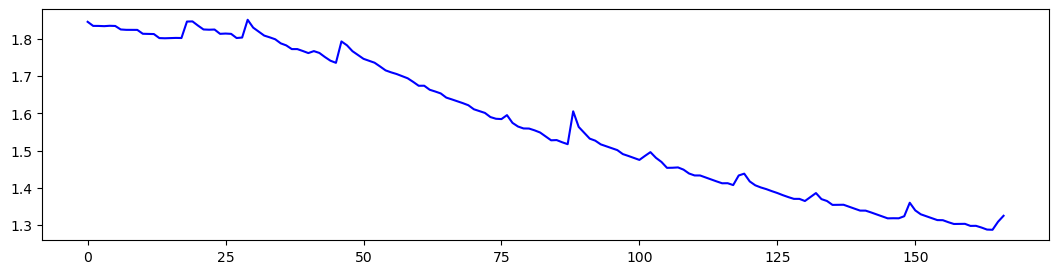

In [18]:
capacity_df = pd.read_csv(f"../DATA/DataFrame/{BAT_No}_capacity_df.csv")
plt.plot(capacity_df.index, capacity_df["capacity"], color='blue')

In [19]:
print(len(bat_df["cycle"].unique()))
print(len(capacity_df["capacity"].unique()))

167
167
